# Reverse image search implementation

Towhee.io is used for extrating embeddings from images before loading into the Milvus database.

In [2]:
import towhee
from data import source
towhee.read_csv(source).show()

.image_decode['path', 'img'](): for each row from the data, read and decode the image at path and put the pixel data into column img


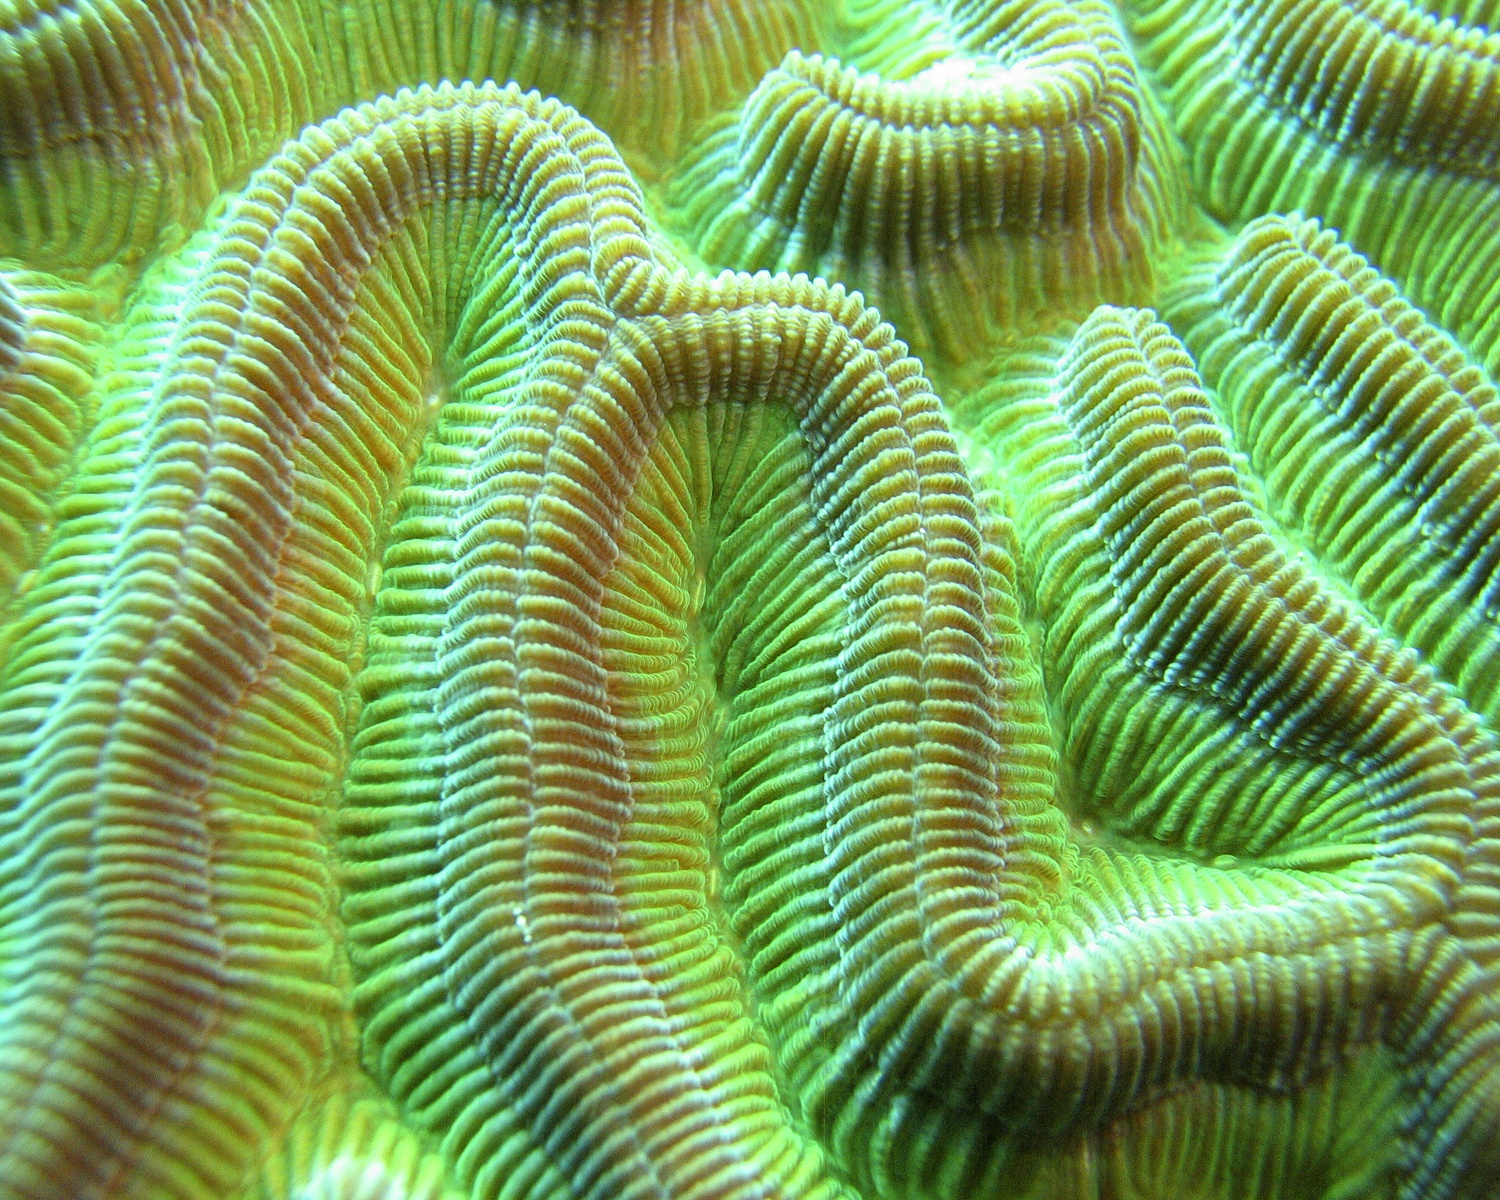
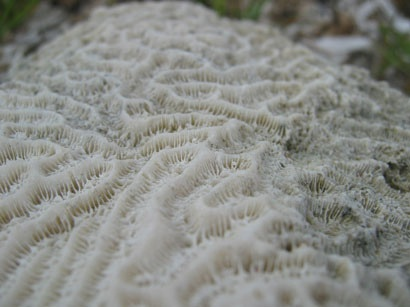
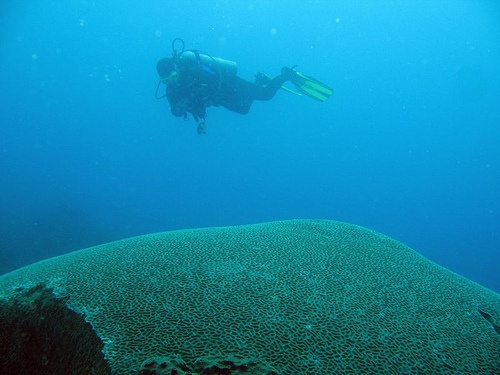

In [4]:
towhee.read_csv(source) \
    .head(3) \
    .image_decode.cv2['path', 'img']() \
    .show()

## resnet50

ResNet-50 is a convolutional neural network that is 50 layers deep.
The network is used for classifying images.
It extracts embeddings from images.

.image_embedding.timm['img', 'vec'](model_name='resnet50') - extracts embeddings, an operator from the Towhee hub based on pytorch-image-models.


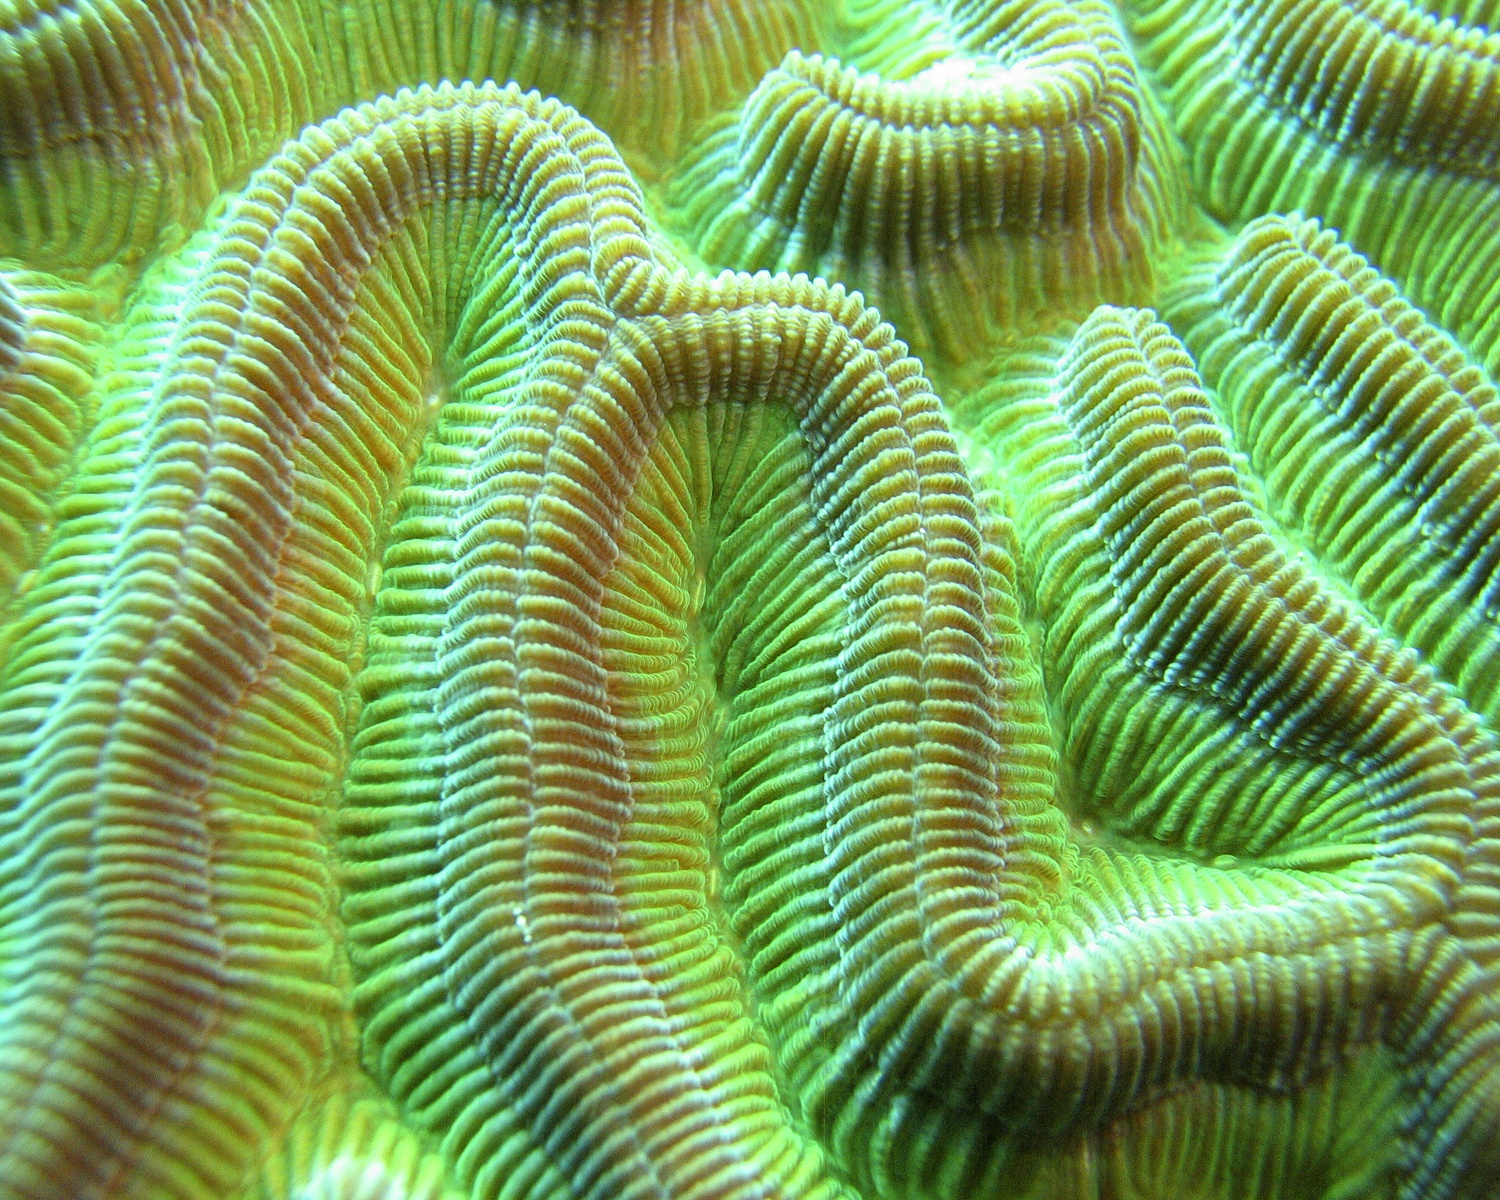
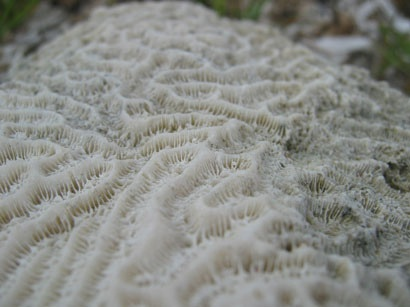
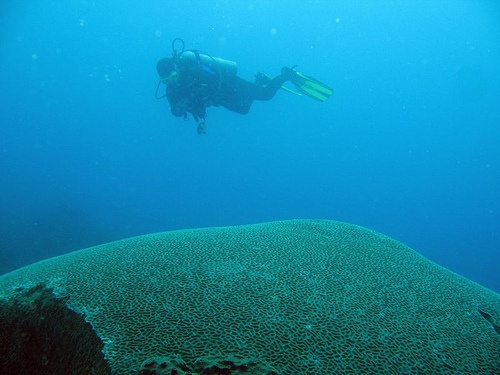
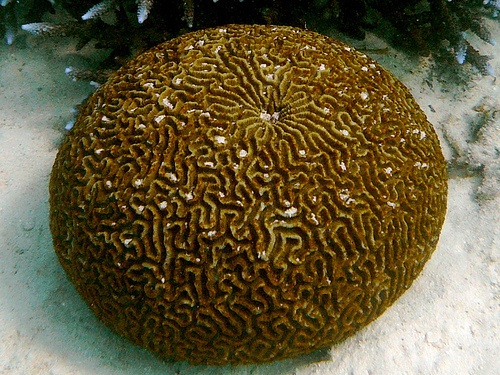

In [25]:
towhee.read_csv(source) \
      .head(4) \
      .image_decode['path', 'img']() \
      .image_embedding.timm['img', 'vec'](model_name='resnet50') \
      .show()

## Milvus search

Read and decode the image at path, extract embedding feature (resnet50) and search in Milvus database with a limit of 5 pictures. For each row of data convert the data type of the column id from string to integer and then select and show the selected images.

.runas_op['id', 'id'](func=lambda x: int(x)): for each row from the data, convert the data type of the column id from str to int



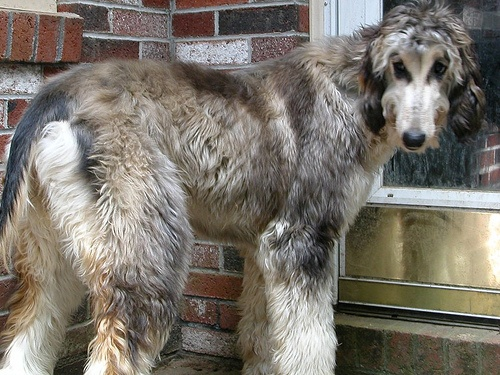
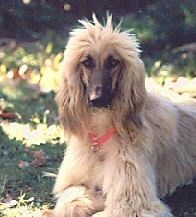
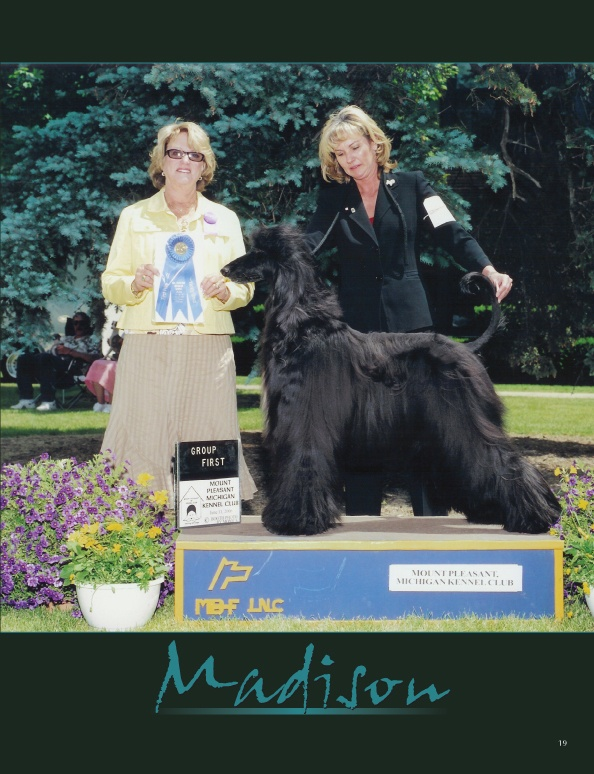
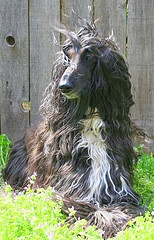
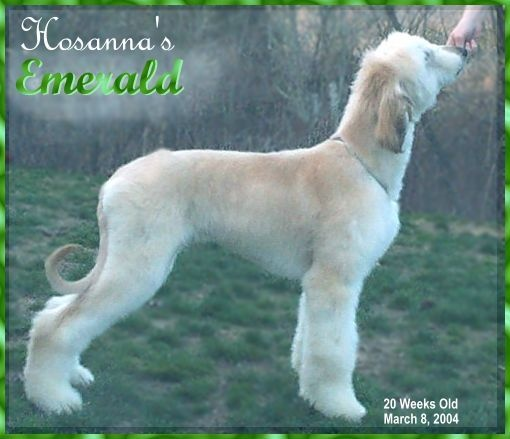
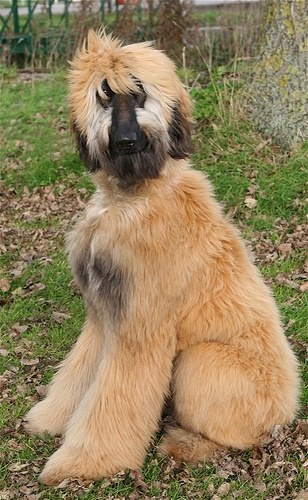
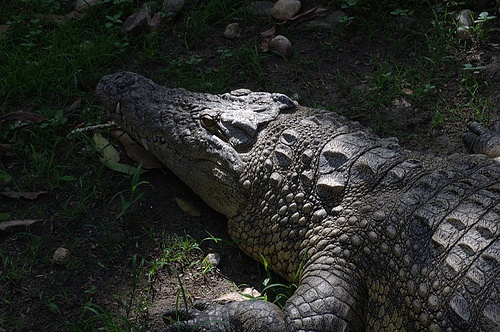
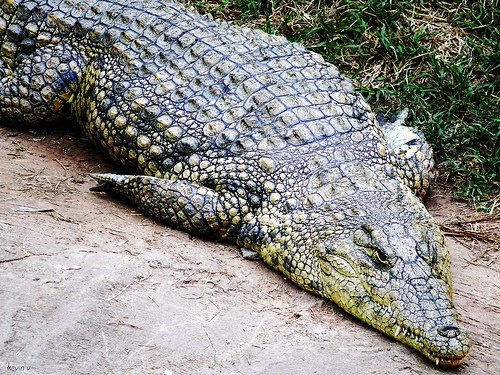
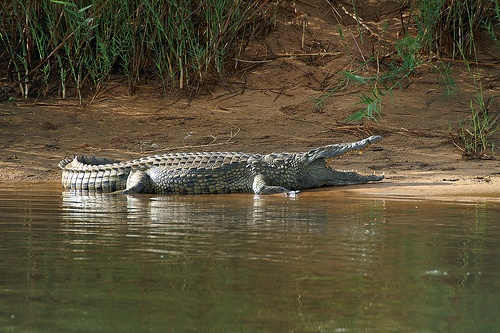
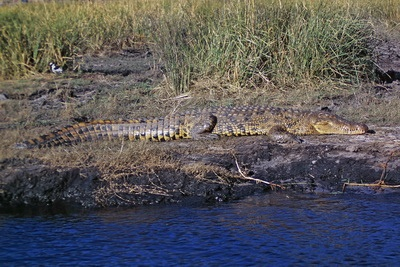
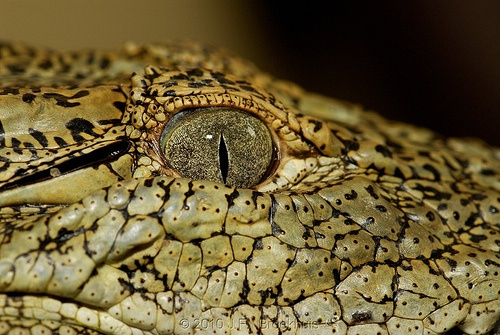
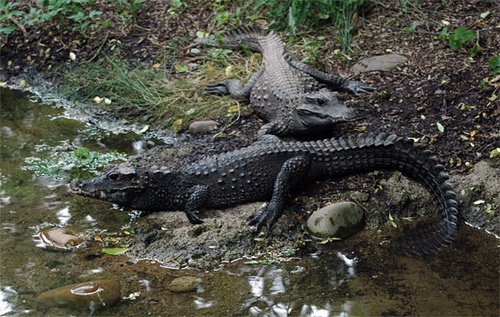
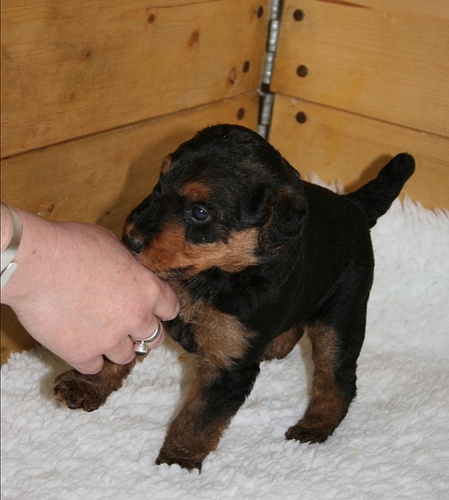
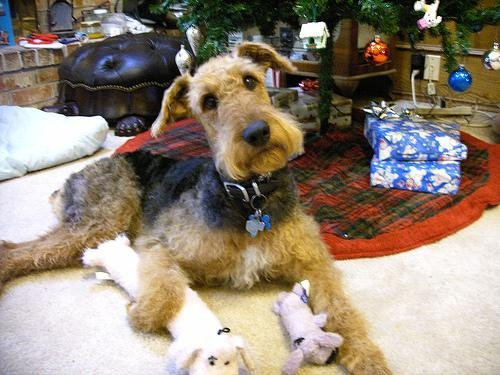
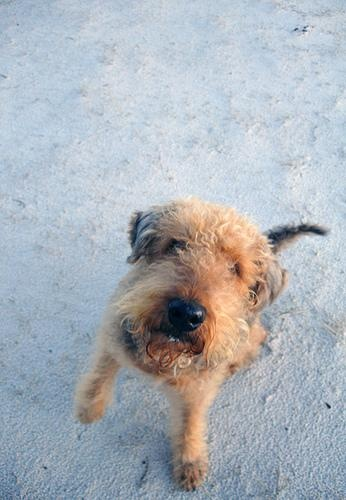
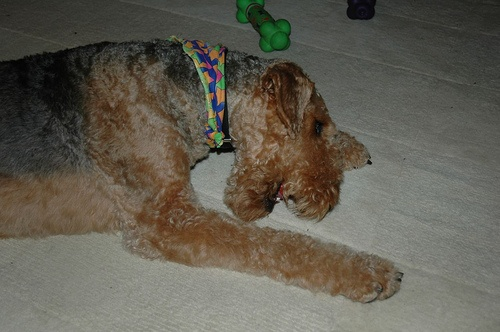
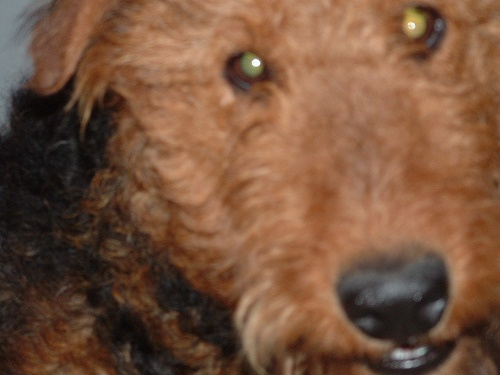
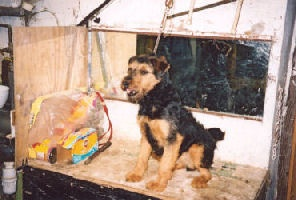
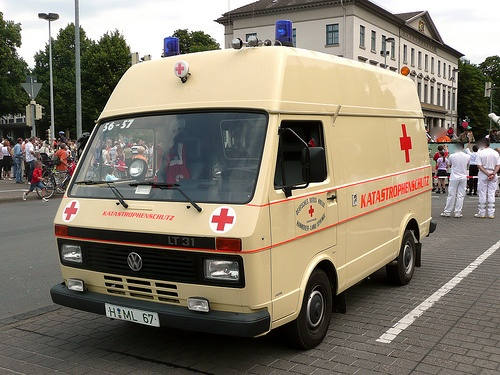
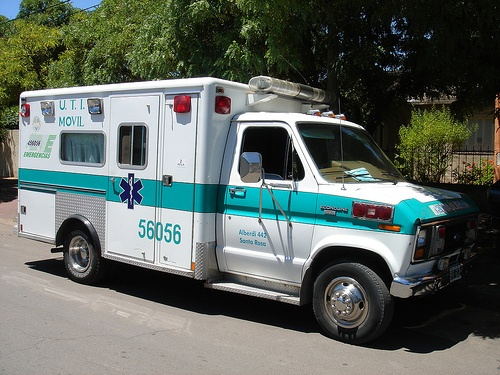
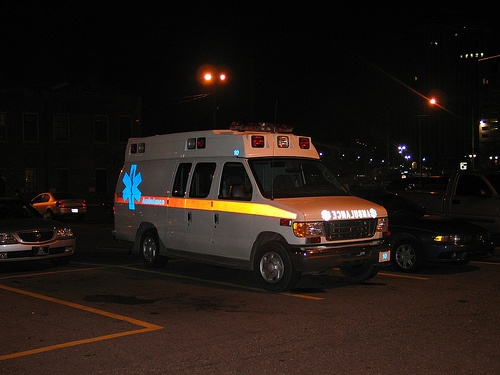
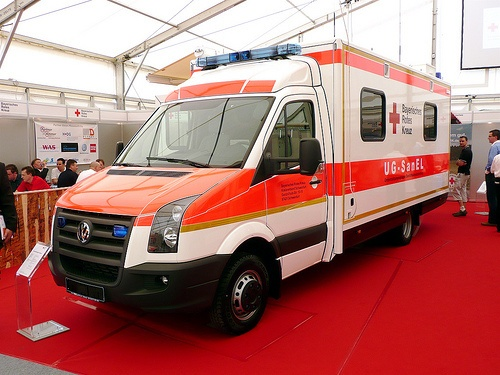
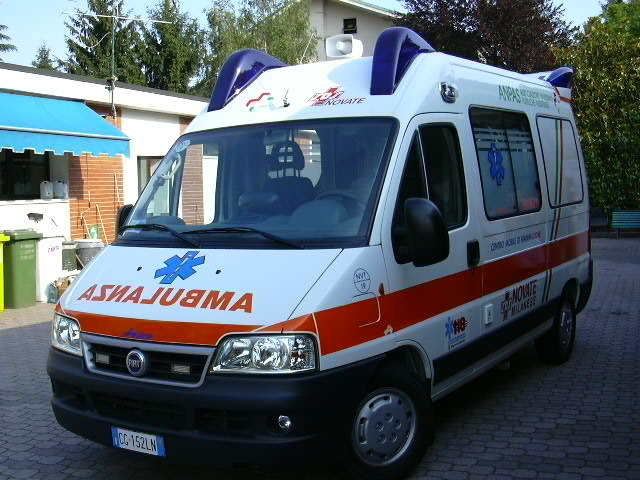
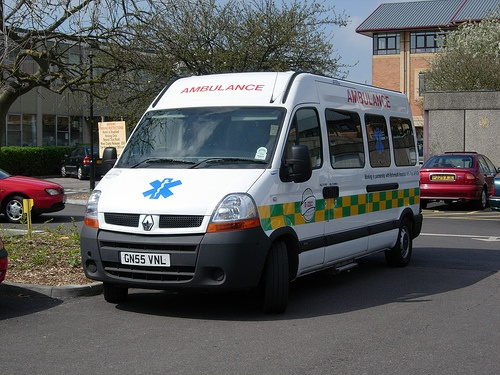
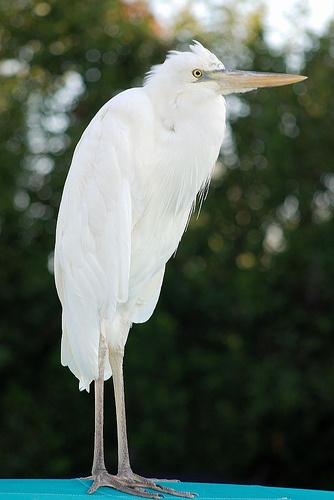
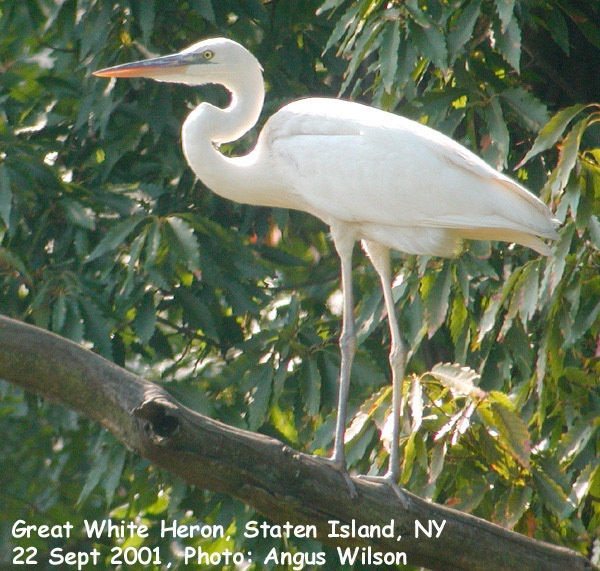
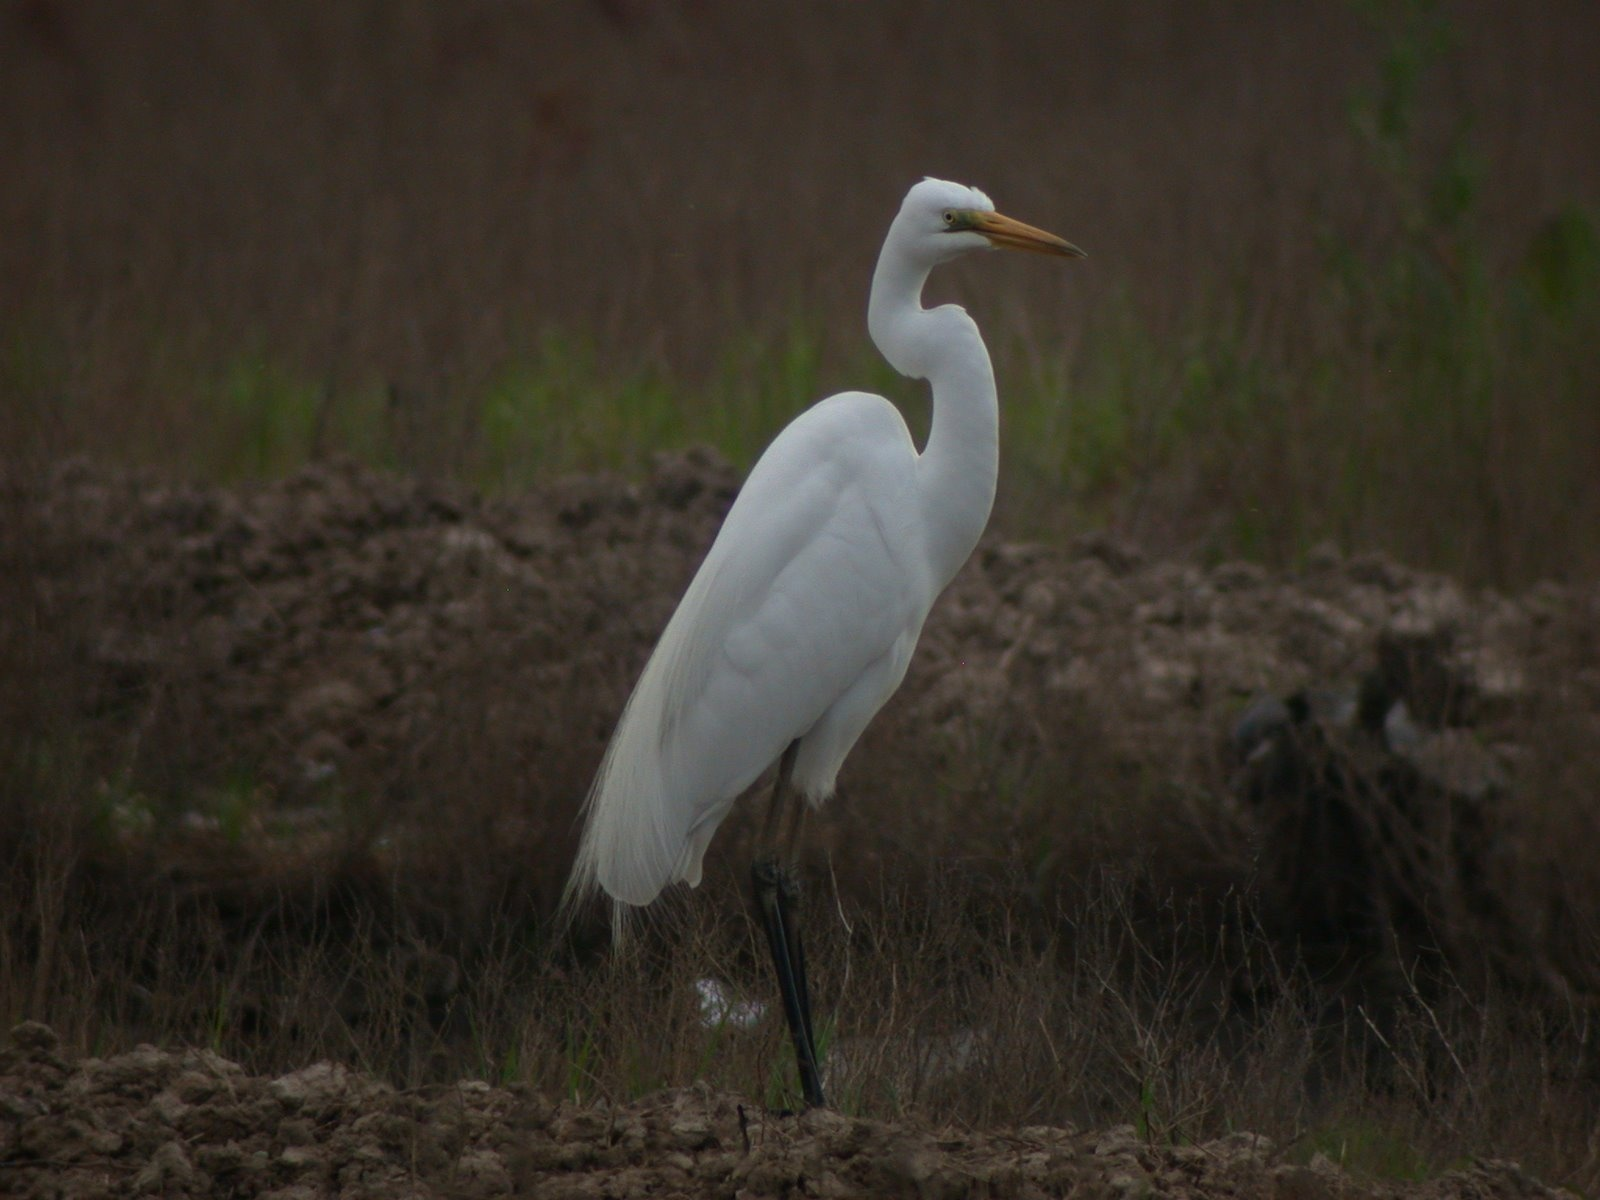
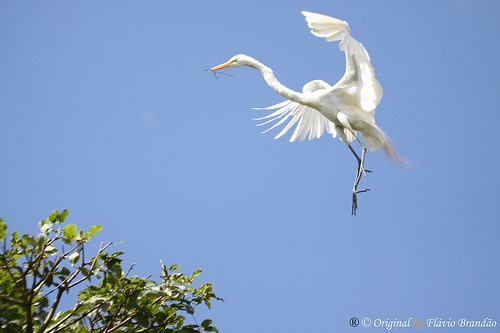
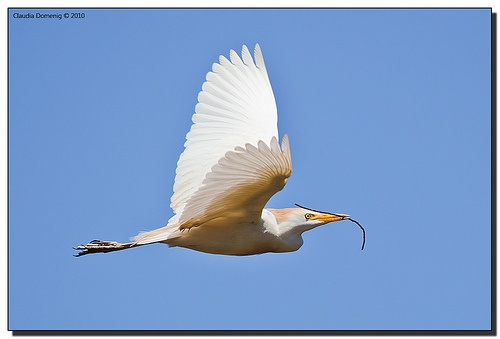
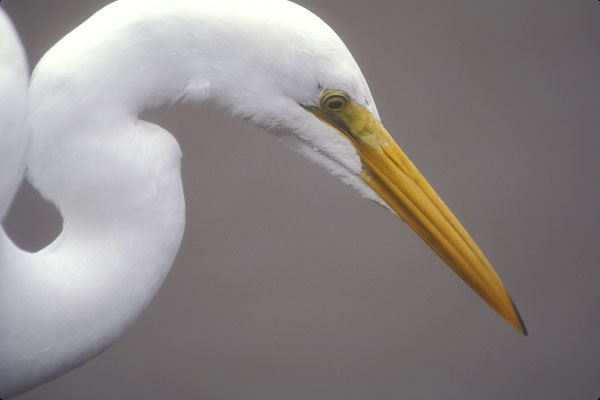

In [12]:
from data import read_images
from loader import collection
(
    towhee.glob['path']('D:/data/test/a*/*.JPEG')
      .image_decode['path', 'img']()
      .image_embedding.timm['img', 'vec'](model_name='resnet50')
      .milvus_search['vec', 'result'](collection=collection, limit=5)
      .runas_op['result', 'result_img'](func=read_images)
      .select['img', 'result_img']()
      .show()
)